<a href="https://colab.research.google.com/github/Migle-M/Crime-in-London/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import warnings
import matplotlib.pyplot as plt
!pip install mplcursors
import mplcursors

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
crime_data = pd.read_csv("finaldf.csv")

# Delete spaces in the headers of csv file
crime_data.columns = crime_data.columns.to_series().apply(lambda x: x.strip())

# Include only the relevant columns of data in a newly created dataframe
df = crime_data[['income', 'crimes per 1000 pop']]

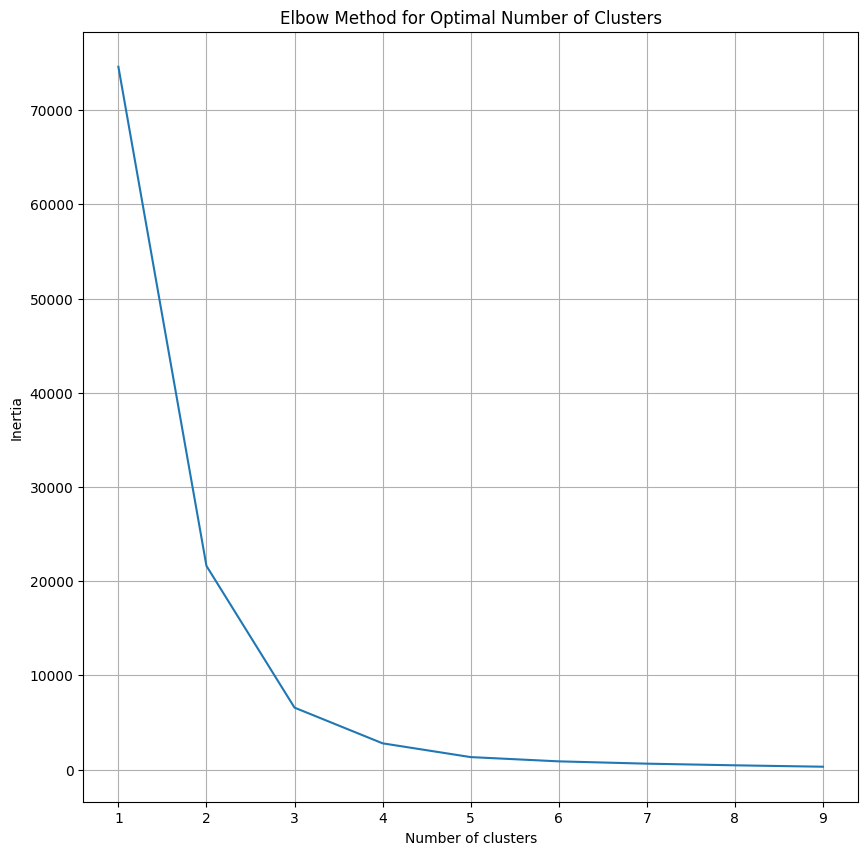

In [ ]:
# Apply Elbow Method to find the most optimal number of clusters

# Try different values of k
k_range = range(1, 10)
scores = []

for k in k_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(df)
    scores.append(km.inertia_)

# Plot the results
plt.figure(figsize=(10, 10))
plt.plot(k_range, scores)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.grid(True)
plt.show()

In the graph above, we observe that the curve flattens where the number of clusters equals 3. Using the Elbow Method we decide that 3 is then the optimal number of clusters.

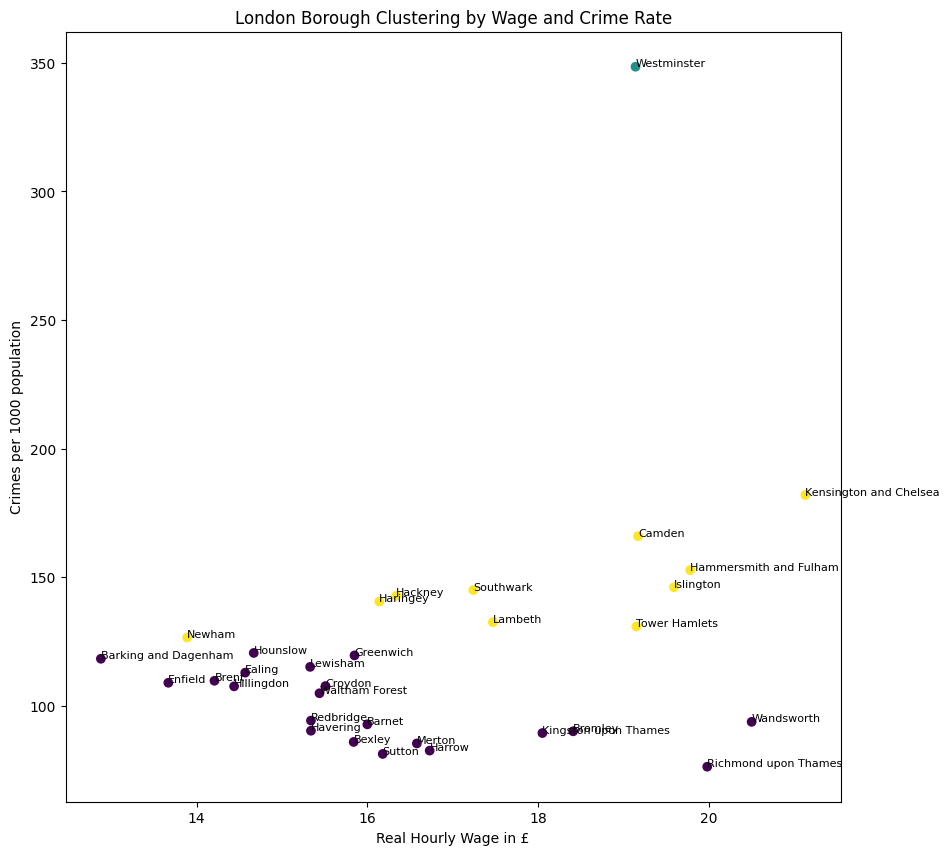

In [ ]:
# Visualize the results on a K-Means clustering graph
plt.figure(figsize=(10, 10))

# Set the number of clusters to the number got from the elbow method
kmeans = KMeans(n_clusters=3, random_state=42)

# Predict the cluster the data point will fall to
df['Cluster'] = kmeans.fit_predict(df)

# Create a plot featuring the clusters of data points
plot = plt.scatter(df['income'], df['crimes per 1000 pop'], c=df['Cluster'])

# Annotate the data points with their respective borough name
for i, txt in enumerate(crime_data['Borough']):
    plt.annotate(txt, (df['income'][i], df['crimes per 1000 pop'][i]), fontsize=8)

plt.xlabel("Real Hourly Wage in £")
plt.ylabel("Crimes per 1000 population")
plt.title("London Borough Clustering by Wage and Crime Rate")
plt.show()